## Process Water Use Data from the National Water Information Center


### Terms defined here
https://water.usgs.gov/watuse/wuglossary.html

Data come in in million's of gallons/day for water and thousands of people for population

In [25]:
files = glob.glob('./data/*_water_use.tsv')

In [26]:
dat = pd.DataFrame()

for fl in files:
    state = fl.split('\\')[-1].split('_')[0]
    tmp = pd.read_table(fl,sep='\t',comment='#',header=1)
    cols = tmp.columns
    tmp = pd.read_table(fl,sep='\t',comment='#',skiprows=311,names=cols,na_values='-')
    tmp['state'] = state
    
    dat = pd.concat([dat,tmp])
    

tuples = list(zip(*[dat.state.as_matrix(),dat.year.as_matrix()]))
dat.index= pd.MultiIndex.from_tuples(tuples,names=['state','year'])
    #dat.index = dat.year

In [27]:
cols = dat.filter(regex='Domestic * self').columns[0:-1]

In [28]:
cols = cols.append(dat.filter(regex='Domestic * de*').columns)

In [30]:
cols

Index(['Domestic self-supplied groundwater withdrawals, fresh, in Mgal/d',
       'Domestic self-supplied groundwater withdrawals, saline, in Mgal/d',
       'Domestic self-supplied surface-water withdrawals, fresh, in Mgal/d',
       'Domestic self-supplied surface-water withdrawals, saline, in Mgal/d',
       'Domestic deliveries from public supply, in Mgal/d'],
      dtype='object')

In [53]:
out = pd.DataFrame({'domestic':dat[cols].sum(axis=1),
    'population':dat['Total Population total population of area, in thousands'],
                   'year':dat.year,'state':dat.state},index=dat.index)

In [54]:
out.domestic *= 1000000 # millions of gallons/day > gallons/day
out.population *= 1000 # thousands of people > people

In [55]:
out['gal_person_day'] = out.domestic/out.population

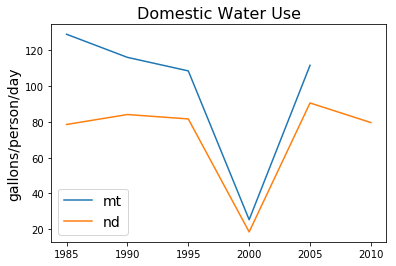

In [67]:
for state in ['mt','nd']:
    df = out.loc[(out.state==state) & (out.gal_person_day>0)]
    plt.plot(df.year,df.gal_person_day,label = state)

plt.legend(fontsize=14)
plt.ylabel('gallons/person/day', fontsize=14)
plt.title('Domestic Water Use', fontsize=16)

In [63]:
out

domestic  population state  year  gal_person_day
state year                                                     
mt    1985  106180000.0    822830.0    mt  1985      129.042451
      1990   92780000.0    799070.0    mt  1990      116.109978
      1995   94460000.0    870280.0    mt  1995      108.539780
      2000   22830000.0    902240.0    mt  2000       25.303689
      2005  104480000.0    935670.0    mt  2005      111.663300
      2010          0.0    989415.0    mt  2010        0.000000
nd    1985   54060000.0    688130.0    nd  1985       78.560737
      1990   53740000.0    638770.0    nd  1990       84.130438
      1995   52380000.0    641400.0    nd  1995       81.665108
      2000   11860000.0    642240.0    nd  2000       18.466617
      2005   57680000.0    636677.0    nd  2005       90.595388
      2010   53560000.0    672591.0    nd  2010       79.632347